### Importing modules

In [61]:
import numpy as np
import statsmodels
import scipy.stats as sts
import matplotlib.pyplot as plt

### Normal Distribution Variables

In [152]:
norm = sts.norm
x = np.linspace(-5,5,20)
loc = 0 # mean
scale = 2 # standard deviation

### Generate normal random samples

In [108]:
norm.rvs(loc, scale, size=10, random_state=None)
#    Random variates.

array([-1.02897094,  1.52911743, -2.80697507,  0.80590943,  0.5436678 ,
        1.88539921,  3.02482195, -2.19565656, -2.41009562, -0.33517615])

### Calculate density probability of a number in a normal distribution

In [109]:
pdf_x = norm.pdf(x, loc, scale); pdf_x
#    Probability density function.

array([0.00876415, 0.01634527, 0.0284445 , 0.04618797, 0.06998157,
       0.09893789, 0.13051662, 0.16065462, 0.18452058, 0.19775187,
       0.19775187, 0.18452058, 0.16065462, 0.13051662, 0.09893789,
       0.06998157, 0.04618797, 0.0284445 , 0.01634527, 0.00876415])

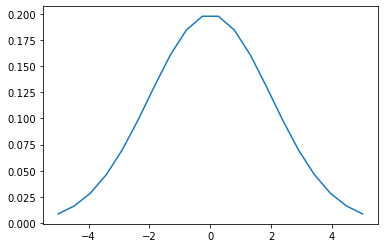

In [110]:
plt.plot(x, pdf_x)

### Cumulative Probability Distribution Function (area below the probability density function until a certain x)

In [111]:
cdf_x = norm.cdf(x, loc, scale)
#    Cumulative distribution function.

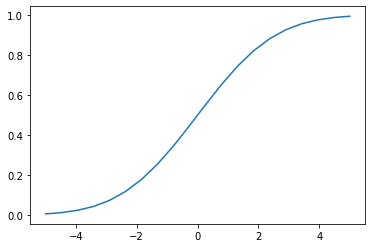

In [112]:
plt.plot(x, cdf_x)

### Percent Point Function -> returns 'x' given a cdf (cumulative probability)

In [134]:
ppf_x = norm.ppf(cdf_x, loc, scale)
#    Percent point function (inverse of ``cdf`` --- percentiles).

##### ppf of cdf_x returns 'x' back again.

In [148]:
(x.round(10) == ppf_x.round(10)).all()

True

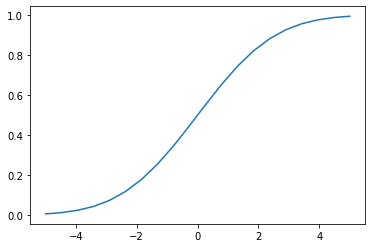

In [136]:
plt.plot(ppf_x, cdf_x)

### Normal Distribution Confidence Interval

In [166]:
alpha = np.linspace(0,1,20)

In [175]:
left_intervals, right_intervals = norm.interval(alpha, loc=loc, scale=scale)
#    Endpoints of the range that contains alpha percent of the distribution

In [ ]:
norm.interval?

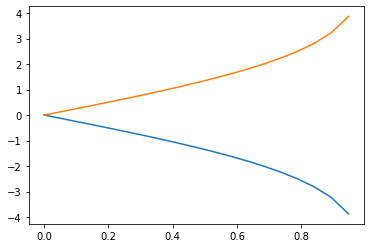

In [169]:
plt.plot(alpha, left_intervals)
plt.plot(alpha, right_intervals)

### Additional Normal Distribution Methods

In [ ]:
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
logcdf(x, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, loc=0, scale=1)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
logsf(x, loc=0, scale=1)
    Log of the survival function.
isf(q, loc=0, scale=1)
    Inverse survival function (inverse of ``sf``).
moment(n, loc=0, scale=1)
    Non-central moment of order n
stats(loc=0, scale=1, moments='mv')
    Mean('m'), variance('v'), skew('s'), and/or kurtosis('k').
entropy(loc=0, scale=1)
    (Differential) entropy of the RV.
fit(data, loc=0, scale=1)
    Parameter estimates for generic data.
expect(func, args=(), loc=0, scale=1, lb=None, ub=None, conditional=False, **kwds)
    Expected value of a function (of one argument) with respect to the distribution.
median(loc=0, scale=1)
    Median of the distribution.
mean(loc=0, scale=1)
    Mean of the distribution.
var(loc=0, scale=1)
    Variance of the distribution.
std(loc=0, scale=1)
    Standard deviation of the distribution

## Teste de hipótese unicaudal (variância real conhecida)

In [ ]:
Ho: u=70
H1: u>70

In [199]:
u = 70

X_ = 71.8
sig = 8.9
n = 100
alpha=0.05

##### Using the z-test and p-value

In [205]:
sig_ = sig / n**0.5 ; sig_

0.89

In [206]:
z_ = (X_ - u) / sig_ ; z_

2.0224719101123565

In [207]:
# p = P(Z > z_)
p = 1 - norm.cdf(x=z_, loc=0, scale=1) ; p

0.021563811339088912

##### valor de x limite para rejeição

In [227]:
z_lim = norm.ppf(0.95, loc=0, scale=1) ; z_lim

1.6448536269514722

In [228]:
x_lim = (z_lim * sig_) + u ; x_lim

71.4639197279868

## Teste de hipótese bi-caudal (variância real conhecida)

In [ ]:
Ho: u = 8 Kg
H1: u != 8 Kg

In [237]:
u = 8 #Kg
sig = 0.5 #Kg

x_ = 7.8 #Kg
n = 50

alpha=0.01

##### Intervalo crítico (Se z_ dentro do intervalo crítico, não rejeitar a hipótese nula)

In [251]:
_z_a2 , z_a2 = intervalo_critico = norm.ppf([alpha/2, 1-alpha/2], 0, 1) ; intervalo_critico

array([-2.5758293,  2.5758293])

In [244]:
sig_ = sig / n**0.5 ; sig_

0.07071067811865475

In [246]:
z_ = (x_ - u) / sig_ ; z_    # z_ está fora do intervalo critico

-2.8284271247461925

##### p-value (Se p < alpha/2 rejeita-se a hipóse nula)

In [250]:
# p =  P(Z < -z_a2) + P(Z > z_a2)
p = norm.cdf(z_, 0, 1); p

0.002338867490523615

#### Nesse caso rejeitamos a hipótese nula

---

### Endereço eletrónico da lista:

http://www.cead.uff.br/ead/pluginfile.php/134961/mod_resource/content/1/Econ_Lista_05_IntervalosConfianca.pdf

---

1. (Farias (2008) - ex.2.1) Os comprimentos das pe¸cas produzidas por determinada
m´aquina tˆem distribui¸c˜ao normal com uma m´edia de 172 mm e desvio padr˜ao de
5 mm. Calcule a probabilidade de uma amostra aleat´oria simples de 16 pe¸cas ter
comprimento m´edio
(a) entre 169 mm e 175 mm;
(b) maior que 178 mm;
(c) menor que 165 mm.


In [2]:
u = 172 #mm
sig2 = 5 #mm

##### (a) entre 169 mm e 175 mm;

In [9]:
P1 = norm.cdf(169, u, sig2 )
P2 = norm.cdf(175, u, sig2 )

In [10]:
P2-P1

0.45149376449985285

##### (b) maior que 178 mm

In [12]:
P1 = 1 - norm.cdf(178, u, sig2 ) ; P1

0.11506967022170822

##### (c) menor que 165 mm

In [13]:
P1 = norm.cdf(165, u, sig2 ) ; P1

0.08075665923377107

---

3. (Farias (2008) - ex.2.4.1) O fabricante de uma lˆampada especial afirma que o seu
produto tem vida m´edia de 1600 horas, com desvio padr˜ao de 250 horas. O dono
de uma empresa compra 100 lˆampadas desse fabricante. Qual ´e a probabilidade de
que a vida m´edia dessas lˆampadas ultrapasse 1650 horas?

In [26]:
u = 1600 #h
sig2 = 250 #h
n = 100 #lampadas

X_ = 1650
# p = P(X > 1650) = ?

4. (Farias (2008) - ex.3.4.4) Com base em dados hist´oricos, uma companhia a´erea
estima em 15% a taxa de desistˆencia entre seus clientes, isto ´e, 15% dos passageiros
com reserva n˜ao aparecem na hora do vˆoo. Para otimizar a ocupa¸c˜ao de suas
aeronaves, essa companhia decide aceitar 400 reservas para os vˆoos em aeronaves que
comportam apenas 350 passageiros. Calcule a probabilidade de que essa companhia
n˜ao tenha assentos suficientes em um desses vˆoos. Essa probabilidade ´e alta o
suficiente para a companhia rever sua pol´ıtica de reserva

In [29]:
p = 0.15
n = 400
p_max = 0.125 # (400-350)/400

# P(p > p_max) = ?

In [34]:
sig2 = p*(1-p)/n

In [33]:
1 - norm.cdf(p_max, sig**0.5)

0.4573364070933974

5. (Farias (2008) - ex.4.2.3.1) Encontre os valores cr´ıticos zα/2 da normal padr˜ao correspondentes aos seguintes n´ıveis de confian¸ca 1 − α: 0,80; 0,90; 0,95; 0,99.

In [46]:
_alpha_i = [0.8, 0.9, 0.95, 0.99]
alpha_i = [1-alpha for alpha in _alpha_i]
alpha_2 = np.array([alpha/2 for alpha in alpha_i])

In [50]:
_z_i = norm.ppf(alpha_2, 0, 1) ; _z_i

array([-1.28155157, -1.64485363, -1.95996398, -2.5758293 ])

In [52]:
z_i = -_z_i ; z_i

array([1.28155157, 1.64485363, 1.95996398, 2.5758293 ])